In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
# import cv2


from numpy.linalg        import inv
from skimage             import img_as_float

%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

We'll look at $nxm$ images. We make a meshgrid of pixel coordinates. Then we make it into a long vector.

In [2]:
n = 28
m = 28


rx, ry = np.arange(0,n, 1), np.arange(0,m, 1)
gx, gy = np.meshgrid(rx, ry) 

# Pair up elems from gx and gy to create array of pairs 
X_2D = np.c_[gx.ravel(), gy.ravel()]

Define the kernel matrix

In [5]:
def kernel(X1, X2, l=1, sigma_f=1.0):
    """
    Isotropic squared exponential kernel.
    Args:
        X1: Array of m points (m x d).  We'll have d=1 or 2. For images we have d = 2.
        X2: Array of n points (n x d).
        l : lenght-scale, default is 1
        sigma_f: vertical variation, default is 1
    Returns:
        (m x n) matrix.
    """
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-(1/(2*l**2)) * sqdist)

**We will first illustrate small variance**

In [6]:
l = 2

K = kernel(X_2D,X_2D, l)

# A Gaussian mixture:

Take a couple of coefficients

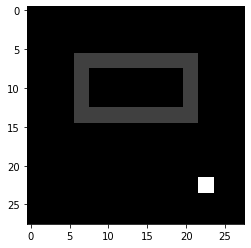

In [8]:
a = np.zeros((n,m))
a[6:15,6:22] = 1
a[8:13,8:20] = 0
a[22:24,22:24] = 4
plt.imshow(a, cmap = 'gray')

Make linear combination of Gaussians centred at the position of those coefficients

In [10]:
a_flat = a.ravel()

# Why multiply with K?
Mix = K@a_flat
Mix = Mix.reshape(a.shape[0],a.shape[1])

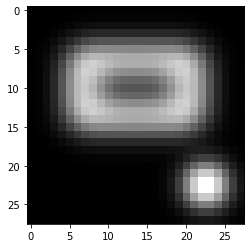

In [11]:
plt.imshow(Mix, cmap = 'gray')

... and get the coefficients back:

In [ ]:
Mix = Mix.ravel()

coeff = np.linalg.pinv(K)@Mix

coeff = coeff.reshape(n,m)
plt.imshow(coeff, cmap = 'gray')

## Now getting the best Gaussian mixture approximation of an image

Here's the image

In [ ]:
img_raw = cv2.imread('img_6.jpg',0)
img = img_as_float(img_raw) 
#img = denoise_tv_chambolle(img,weight=0.1) # TV denoise
plt.imshow(img, cmap = 'jet')
plt.title("true image")
plt.colorbar()

Here are the least squares solution coefficients

In [ ]:
img_flat = img.ravel()

coeff = np.linalg.pinv(K)@img_flat

coeff = coeff.reshape(n,m)
plt.imshow(coeff, cmap = 'jet')
plt.title("Coefficients")
plt.colorbar()

Here is the approximation:

In [ ]:
coeff_flat = coeff.ravel()
Approx = K@coeff_flat
Approx = Approx.reshape(a.shape[0],a.shape[1])
plt.imshow(Approx, cmap = 'jet')
plt.title("Gaussian mixture approximation")
plt.colorbar()


Difference between true image and Gaussian mixture approximation:

In [ ]:
plt.imshow(img - Approx, cmap = 'jet')
plt.title("Difference between truth and approximation")
plt.colorbar()

## Now here is for larger variance:

In [ ]:
l = 6.5

K = kernel(X_2D,X_2D, l)

In [ ]:
img_flat = img.ravel()

coeff = np.linalg.pinv(K)@img_flat

coeff = coeff.reshape(n,m)
plt.imshow(coeff, cmap = 'jet')
plt.title("Coefficients")
plt.colorbar()

In [ ]:
coeff_flat = coeff.ravel()
Approx = K@coeff_flat
Approx = Approx.reshape(a.shape[0],a.shape[1])
plt.imshow(Approx, cmap = 'jet')
plt.title("Gaussian mixture approximation")
plt.colorbar()

In [ ]:
plt.imshow(img - Approx, cmap = 'jet')
plt.title("Difference between truth and approximation")
plt.colorbar()